# IBM Unsupervised Learning Capstone Project

*by Lucian Popa*

**Februry, 2022**

## Introduction

The heart is an amazing organ. It continuously pumps oxygen and nutrient-rich blood throughout your body to sustain life. This fist-sized powerhouse beats (expands and contracts) 100,000 times per day pumping 23,000 liters (5,000 gallons) of blood every day. To work properly, the heart (just like any other muscle) needs a good blood supply.   
WHO announced that cardiovascular diseases is the top one killer over the world. There are seventeen million people died from it every year, especially heart disease. Prevention is better than cure. If we can evaluate the risk of every patient who probably has heart disease, that is, not only patients but also everyone can do something earlier to keep illness away.

A heart attack (also known as myocardial infarction; MI) is defined as the sudden blockage of blood flow to a portion of the heart. Some of the heart muscle begins to die during a heart attack, and without early medical treatment, the loss of the muscle could be permanent. 

Conditions such as high blood pressure, high blood cholesterol, obesity, and diabetes can raise the risk of a heart attack.  Behaviors such as an unhealthy diet, low levels of physical activity, smoking, and excessive alcohol consumption can contribute to the conditions that can cause heart attacks.  Some factors, such as age and family history of heart disease, cannot be modified but are associated with a higher risk of a heart attack.

## Dataset

For the exploration of the risk a person has to develop a heart attack, the [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset) from *kaggle.com* was utilized. It consists of:

+ Age of the patient (age in years)
+ Sex of the patient (sex; 1 = male, 0 = female)
+ Exercise induced angina (exng; 1 = yes, 0 = no)
+ Number of major vessels (ca; 0-3)
+ Chest pain type (cp; Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
+ Resting blood pressure (trestpbs; in mm/Hg on admission to the hospital)
+ Cholesterol levels (chol; in mg/dl)
+ Fasting blood sugar (fbs; if > 120 mg/dl, 1 = true; 0 = false)
+ Resting electrocardiographic results (rest_ecg; 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
+ Maximum heart rate achieved (thalach)
+ Chance of heart attack (target: Heart disease)
+ A blood disorder called thalassemia (thall; 1 = normal; 2 = fixed defect; 3 = reversable defect)
+ Previous peak (oldpeak; ST depression induced by exercise relative to rest - ‘ST’ relates to positions on the ECG plot)
+ Slope (slp; the slope of the peak exercise ST segment, Value 1: upsloping, Value 2: flat, Value 3: downsloping)

## The goal:

The aim of this project is to apply unsupervised learning techniques to find whether an individual will develop a heart attack risk or not. More specifically, after some feature engineering and exploratory data analysis, the k-means and agglomerative clusteing algorithms will be explored.

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import the dataset and load it into a DataFrame
data = pd.read_csv("data/heart.csv")

# make a copy of the original data
df = data.copy()

### EDA, data cleaning and feature engineering

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


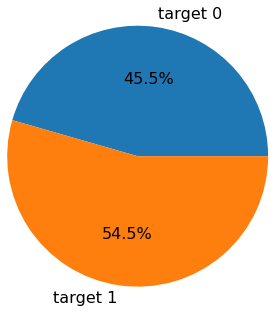

In [9]:
# plot percentage of the people with heart disease

# set the target column for this plot
df_target = df.groupby("target").size()

# set up the plot
plt.pie(df_target.values, labels = ["target 0", "target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()


54.5 % of the people in this dataset were diagnosed with heart disease

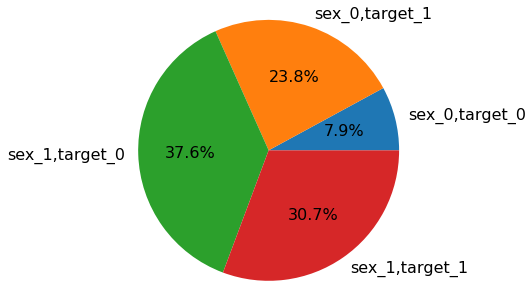

In [10]:
# plot the percenteges by sex

# set the target column for this plot
df_sex = df.groupby(["sex","target"]).size()

# set up the plot
plt.pie(df_sex.values, labels = ["sex_0,target_0", "sex_0,target_1", "sex_1,target_0", "sex_1,target_1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

The percentage of male diagnosed with heart disease is higer, 30.7% are male and 23.8% are female.

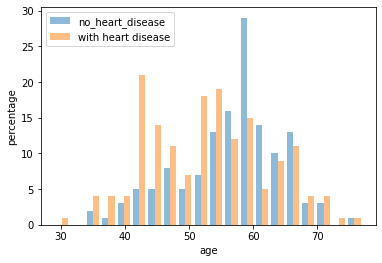

In [11]:
# Let's see how distribution of age is
# set up the plot
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

According to this plot, people over 40 years old have a higer change of being diagnised with heart disease.

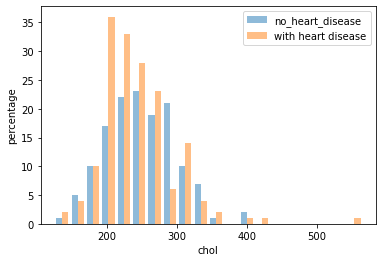

In [12]:
# plot the distribution chol
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

According to the research, the normal value of chol should be lower than 200mg/dl. The number of people with heart disease spikes up when chol goes above 200mg/dl.

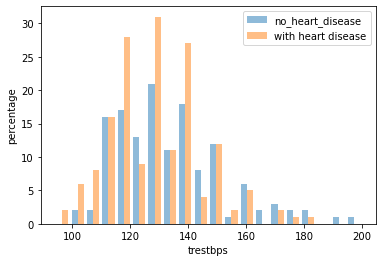

In [13]:
# plot the blood presure while resting
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

The ideal blood pressure should be lower than 120 mmHg. 

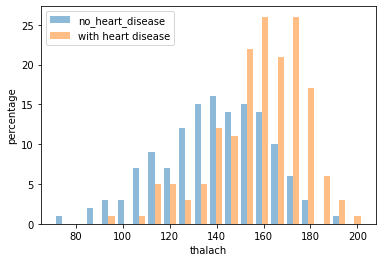

In [14]:
# plot maximum heart rate ( which is negatively related to the age)
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

Seems like the heart rate is really high for those with heart disease.

#### Before we continue we need to continue the exploration of the data, remove duplicates, if any and remove outliers.

In [15]:
# check for duplicates and remove them
duplicate = df[df.duplicated()]

print("Duplicate Rows :")

duplicate

Duplicate Rows :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [16]:
# drop duplicates
clean_df = df.drop_duplicates()

In [17]:
clean_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
clean_df.count()

age         302
sex         302
cp          302
trestbps    302
chol        302
fbs         302
restecg     302
thalach     302
exang       302
oldpeak     302
slope       302
ca          302
thal        302
target      302
dtype: int64

In [20]:
# transform numerical columns into categorical
categorical = ['sex', 'exang', 'ca', 'cp', 'thal', 'fbs', 'restecg', 'slope', 'target']

for cat in categorical:
    clean_df[cat] = clean_df[cat].astype('category')

In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    category
 2   cp        302 non-null    category
 3   trestbps  302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalach   302 non-null    int64   
 8   exang     302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slope     302 non-null    category
 11  ca        302 non-null    category
 12  thal      302 non-null    category
 13  target    302 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 18.2 KB


In [22]:
# set the target column and normalize data
clean_df['target'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: target, dtype: float64

In [24]:
# reset the index
clean_df= clean_df.reset_index(drop=True)

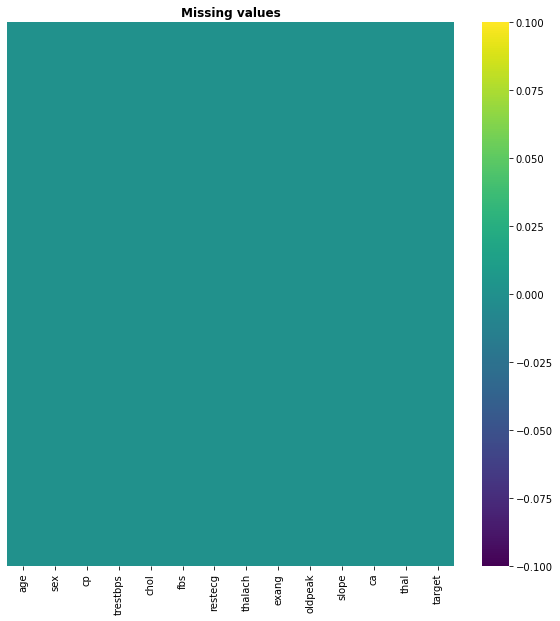

In [25]:
# check for missing value and plot the information

plt.figure(figsize=(10, 10))
plt.title('Missing values', fontweight='bold')

ax = sns.heatmap(clean_df.isnull(),yticklabels=False,cbar='viridis',cmap='viridis')

plt.show()

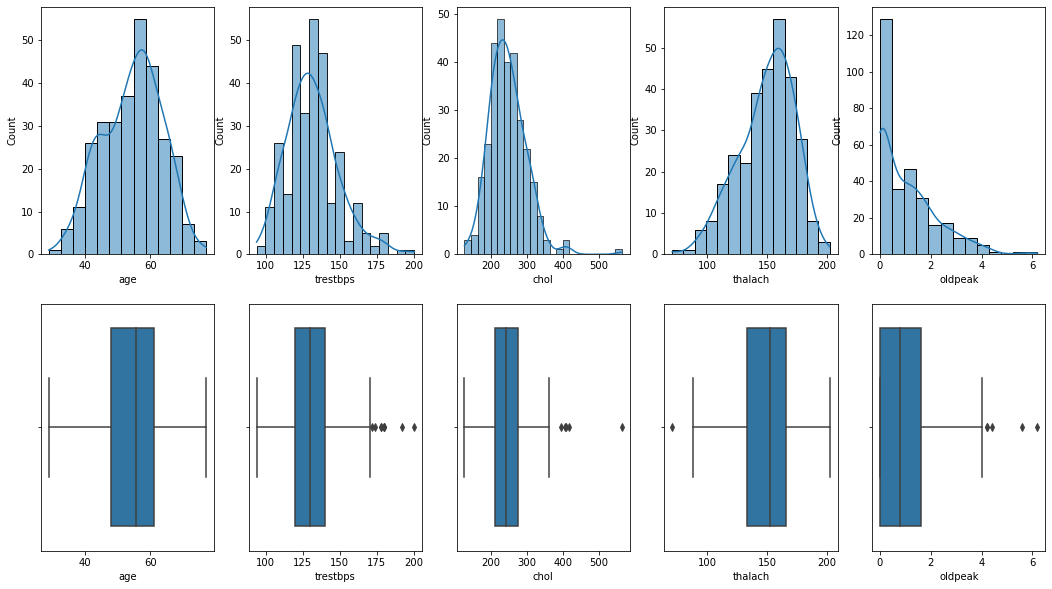

In [26]:
# Finding outliers and plotting histograms for all numerical features

plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
sns.histplot(clean_df['age'],kde=True)
plt.subplot(2,5,6)
sns.boxplot(clean_df['age'])
plt.subplot(2,5,2)
sns.histplot(clean_df['trestbps'],kde=True)
plt.subplot(2,5,7)
sns.boxplot(clean_df['trestbps'])
plt.subplot(2,5,3)
sns.histplot(clean_df['chol'],kde=True)
plt.subplot(2,5,8)
sns.boxplot(clean_df['chol'])
plt.subplot(2,5,4)
sns.histplot(clean_df['thalach'],kde=True)
plt.subplot(2,5,9)
sns.boxplot(clean_df['thalach'])
plt.subplot(2,5,5)
sns.histplot(clean_df['oldpeak'],kde=True)
plt.subplot(2,5,10)
sns.boxplot(clean_df['oldpeak']);

### Removing the outliers

In [27]:
clean_df.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [28]:
for col in ['trestbps', 'chol', 'oldpeak']:
    
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    clean_df.loc[clean_df[col] > Q3 + 1.5 * IQR, col] = clean_df.describe().loc['50%'][col]

In [29]:
Q1 = clean_df['thalach'].quantile(0.25)
Q3 = clean_df['thalach'].quantile(0.75)
IQR = Q3 - Q1
min_thalach = Q1 - 1.5 * IQR

median_thalach = clean_df.describe().loc['50%']['thalach']
clean_df.loc[clean_df['thalach'] < min_thalach, 'thalach'] = median_thalach

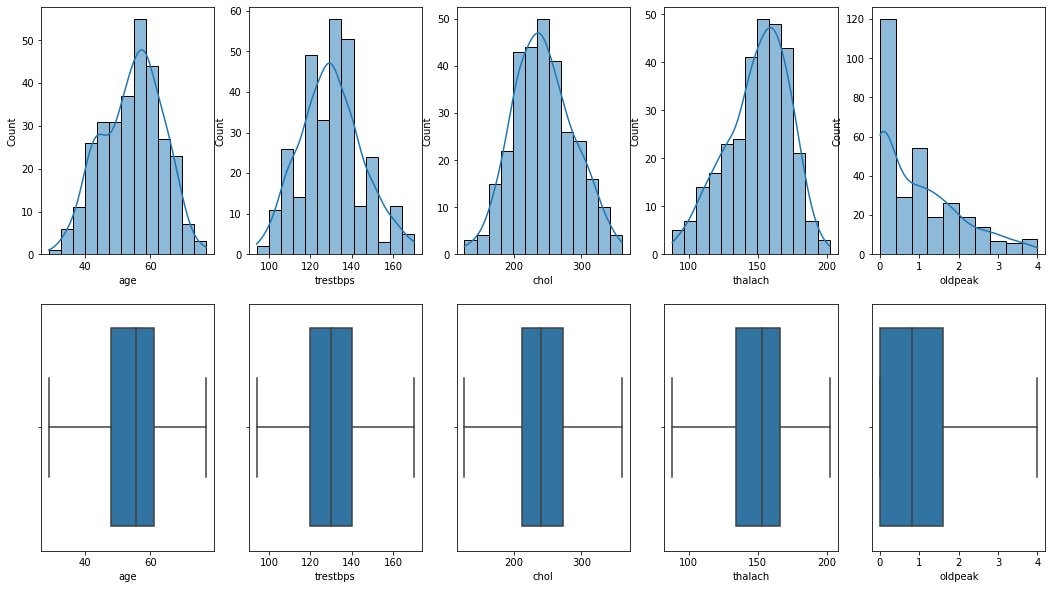

In [31]:
# plot the distribution without the outliers
plt.figure(figsize=(18,10))
plt.subplot(2,5,1)
sns.histplot(clean_df['age'],kde=True)
plt.subplot(2,5,6)
sns.boxplot(clean_df['age'])
plt.subplot(2,5,2)
sns.histplot(clean_df['trestbps'],kde=True)
plt.subplot(2,5,7)
sns.boxplot(clean_df['trestbps'])
plt.subplot(2,5,3)
sns.histplot(clean_df['chol'],kde=True)
plt.subplot(2,5,8)
sns.boxplot(clean_df['chol'])
plt.subplot(2,5,4)
sns.histplot(clean_df['thalach'],kde=True)
plt.subplot(2,5,9)
sns.boxplot(clean_df['thalach'])
plt.subplot(2,5,5)
sns.histplot(clean_df['oldpeak'],kde=True)
plt.subplot(2,5,10)
sns.boxplot(clean_df['oldpeak']);

In [32]:
# check the number of unique values
for col in clean_df.columns:
    print(col,":",clean_df[col].unique().size)

age : 41
sex : 2
cp : 4
trestbps : 43
chol : 148
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 36
slope : 3
ca : 5
thal : 4
target : 2


In [33]:
# define numerical columns
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [34]:
# check to see skewed data and perform transformation of numerical columns
log_columns = clean_df[numerical].skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

oldpeak    0.96995
dtype: float64

In [35]:
# perform log transformations
for col in log_columns.index:
    clean_df[col] = np.log1p(clean_df[col])

In [37]:
# scale the data
sc = StandardScaler()
feature_columns = [x for x in clean_df.columns if x not in categorical]
for col in feature_columns:
    clean_df[col] = sc.fit_transform(clean_df[[col]])

clean_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.987461,-0.229564,1,0,0.007165,0,1.284737,0,0,1,1
1,-1.928548,1,2,-0.004379,0.152039,0,1,1.657982,0,1.905745,0,0,2,1
2,-1.485726,0,1,-0.004379,-0.880534,0,0,0.988732,0,0.647114,2,0,2,1
3,0.174856,1,1,-0.665606,-0.162222,0,1,1.256432,0,0.071103,2,0,2,1
4,0.285561,0,0,-0.665606,2.486552,0,1,0.587182,1,-0.164728,2,0,2,1


## K-Means Clustering


In [39]:
# fit the data into a k-means clustering model to determine the optimal number of clusters over a range of 1 to 20 clusters
km_list = list()

for clust in range(1,20):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(clean_df.drop('target', axis=1))
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

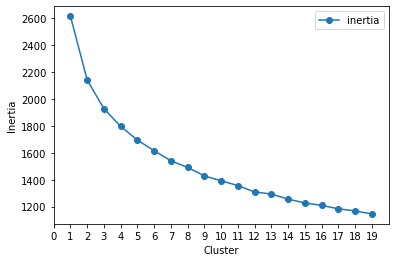

In [40]:
# diagram below shows a plot of inertia versus clusters
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,20))
ax.set_xlim(0,20)
ax.set(xlabel='Cluster', ylabel='Inertia');

The plot of inertia versus number of clusters shows an elbow at number of clusters equal to 2, that is k =2.

In [42]:
# check to see how well it predicts with n_clusters set to 2 
km = KMeans(n_clusters=2, random_state=42)
km = km.fit(clean_df.drop('target', axis=1))

clean_df['kmeans'] = km.predict(clean_df.drop('target', axis=1))
(clean_df[['target','kmeans']]
             .groupby(['kmeans','target'])
             .size()
             .to_frame()
             .rename(columns={0:'number'}))

number
kmeans target        
0      0           40
       1          142
1      0           98
       1           22

### Agglomerative Clustering

In [43]:
for linkage in ['complete', 'ward']:
    ag = AgglomerativeClustering(n_clusters=2, linkage=linkage, compute_full_tree=True)
    ag = ag.fit(clean_df.drop('target', axis=1))
    clean_df[str('agglom_'+linkage)] = ag.fit_predict(clean_df.drop('target', axis=1))

In [44]:
# score using ward linkage
(clean_df[['target','agglom_ward']]
         .groupby(['target','agglom_ward'])
         .size()
         .to_frame()
         .rename(columns={0:'number'}))

number
target agglom_ward        
0      0                37
       1               101
1      0               131
       1                33

In [45]:
# score using complete linkage
(clean_df[['target','agglom_complete']]
         .groupby(['target','agglom_complete'])
         .size()
         .to_frame()
         .rename(columns={0:'number'}))

number
target agglom_complete        
0      0                    93
       1                    45
1      0                    18
       1                   146

In [46]:
# Comparison
(clean_df[['target','agglom_complete', 'agglom_ward','kmeans']]
         .groupby(['target', 'agglom_complete', 'agglom_ward', 'kmeans'])
         .size()
         .to_frame()
         .rename(columns={0:'number'}))

number
target agglom_complete agglom_ward kmeans        
0      0               0           0            2
                                   1            0
                       1           0            3
                                   1           88
       1               0           0           33
                                   1            2
                       1           0            2
                                   1            8
1      0               0           0            0
                                   1            0
                       1           0            2
                                   1           16
       1               0           0          131
                                   1            0
                       1           0            9
                                   1            6

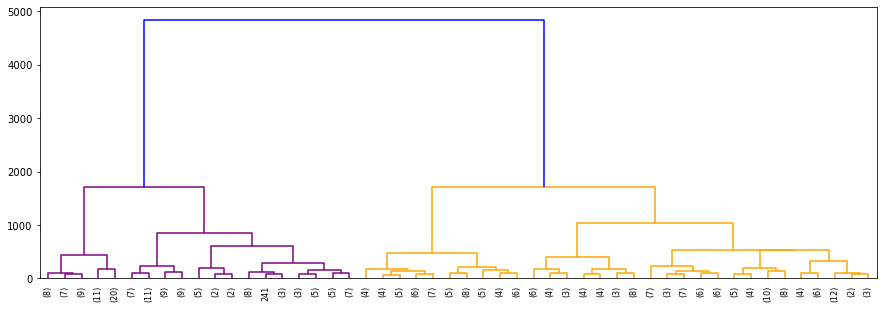

In [48]:
# diagram below shows the dendrogram for the Hierarchical Agglomerative Clustering model
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['purple', 'orange'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=50, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')

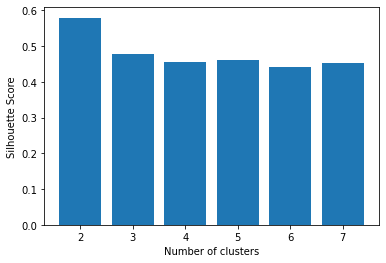

In [49]:
# plot the silhouette_scores by number of clusters
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(ag.children_, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(ag.children_))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Conclusion

### Findings
From the abovementioned analysis, a few important findings can be outlined. Performing both K-means and agglomerative clustering algorithms, one could observe that the best model for the prediction of a potential myocardial infarction is the **Complete-link agglomerative technique**. On the contrary, for predicting those cases that there won't be any implications, the most suitable is the **Ward-link agglomerative clustering**. From both the dendrogram and the silhoute score plots, it is evident that the optimal number of the clusters is **two**.

### Next steps
As a further suggestion, a DBSCAN could be implemented, following a Principal Component Analysis.

*Notes:*

In addition, everyone should always keep an eye on the resting blood pressure. The ideal resting blood pressure is lower than 120mmHg, but if your blood pressure is much lower than the 120mmHg, it means that you are under high risk of heart disease. Besides, the problem will not be only heart when the blood pressure is higher than 150mmHg.

Lots and lots of electronic devices that can measure heart rate, so it's easier to monitor your own. Record max heart rate to make sure that your heart is still healthy. Once the rate rises year by year, there must be something wrong with you. 

No matter how healthy we are, we must do annual examination because another features can not be taken care of by ourselves. Finally, don't forget the older we are, the higher the risks are.